## Listings Analysis

In this section we take a look at the `listings.csv` files per city. Our main goal is to provide insights into the relation between amenities offered and bookings and whether this relation varies depending on the city.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

## Import internal modules
sys.path.append('..')
from src.config import config as cf
from src import data as dt

## matplotlib configurations
%matplotlib inline
plt.style.use('fivethirtyeight')



In [13]:
## Read .csv data
b_listings = pd.read_csv(cf.data_dir.joinpath('raw').joinpath('boston_listings.csv'))
s_listings = pd.read_csv(cf.data_dir.joinpath('raw').joinpath('seattle_listings.csv'))

b_listings['city'] = 'Boston'
s_listings['city'] = 'Seattle'

listings = b_listings.append(s_listings, sort = False)

The dataframe has in total 7403 rows and 95 features.

There are the following number of features per type:

object     65
float64    17
int64      13
dtype: int64

54.74% of the features have missing values


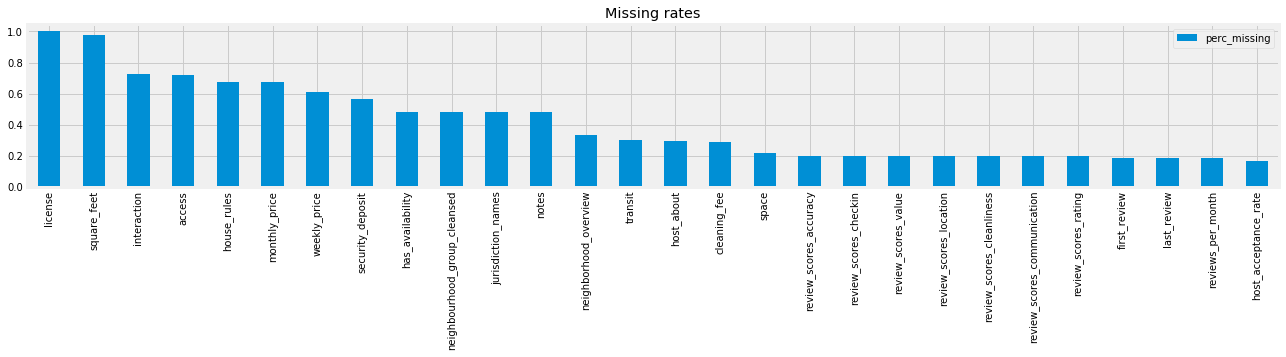

In [3]:
# listings.columns.sort_values ()
# listings.dtypes
plt.rcParams['figure.figsize'] = (20,3)

dt.data_first_look(listings, perc_missing = 0.15)


Luckily for our research question, the related columns do not have missing values:

In [16]:
listings[["amenities", 'availability_30', "city"]].isnull().sum()


amenities          0
availability_30    0
city               0
dtype: int64

There is, however, a formatting issue regarding the amenities column: a single column can contain multiple amenities, as the values are in a string separated by commas. Therefore additional operations are needed.

In [24]:
## We need to know what is the max. no. of amenities a listing contains
# no_spaces = lambda c: c.str.count(' ')
# listings['amenities'].apply(no_spaces).max()
listings['amenities'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,{TV,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Pets live on this property""",Dog(s),Heating,"""Family/Kid Friendly""",Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
1,{TV,Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Pets Allowed""","""Pets live on this property""",Dog(s),Heating,"""Family/Kid Friendly""",...,None,None,None,None,None,None,None,None,None,None
2,{TV,"""Cable TV""","""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""",Heating,Washer,Dryer,"""Smoke Detector""",...,None,None,None,None,None,None,None,None,None,None
3,{TV,Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""",Gym,Breakfast,"""Indoor Fireplace""",Heating,...,Iron,"""Laptop Friendly Workspace""}",None,None,None,None,None,None,None,None
4,{Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Breakfast,Heating,"""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""",Essentials,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""","""Wheelchair Accessible""",Kitchen,"""Free Parking on Premises""",Heating,"""Family/Kid Friendly""",...,None,None,None,None,None,None,None,None,None,None
3814,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""",Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Fire Extinguisher""",...,None,None,None,None,None,None,None,None,None,None
3815,"{""Cable TV""","""Wireless Internet""",Kitchen,"""Free Parking on Premises""",Breakfast,"""Pets live on this property""",Dog(s),Cat(s),Heating,Washer,...,None,None,None,None,None,None,None,None,None,None
3816,{TV,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Elevator in Building""",Heating,"""Smoke Detector""",Essentials,Hangers,"""Hair Dryer""",...,None,None,None,None,None,None,None,None,None,None
